# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

<h1>Setup</h1>

In [2]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
scdf = pd.read_csv(r'Day 3 Datasets\SkillCraft1_Dataset.csv')

<h1>Summary Statistics</h1>

In [4]:
scdf.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [5]:
scdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [6]:
scdf.describe().round(2)

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.00,3395.00,3395.00,3395.00,3395.0,3395.00,3395.0,3395.0,3395.00,3395.00,3395.00,3395.00,3395.00,3395.00,3395.00,3395.0,3395.0
mean,4805.01,4.18,117.05,0.00,0.0,4.36,0.0,0.0,0.00,40.36,63.74,5.27,22.13,0.00,6.53,0.0,0.0
std,2719.94,1.52,51.95,0.01,0.0,2.36,0.0,0.0,0.00,17.15,19.24,1.49,7.43,0.00,1.86,0.0,0.0
min,52.00,1.00,22.06,0.00,0.0,0.00,0.0,0.0,0.00,6.67,24.09,2.04,5.00,0.00,2.00,0.0,0.0
25%,2464.50,3.00,79.90,0.00,0.0,3.00,0.0,0.0,0.00,28.96,50.45,4.27,17.00,0.00,5.00,0.0,0.0
50%,4874.00,4.00,108.01,0.00,0.0,4.00,0.0,0.0,0.00,36.72,60.93,5.10,22.00,0.00,6.00,0.0,0.0
75%,7108.50,5.00,142.79,0.01,0.0,6.00,0.0,0.0,0.00,48.29,73.68,6.03,27.00,0.00,8.00,0.0,0.0
max,10095.00,8.00,389.83,0.04,0.0,10.00,0.0,0.0,0.01,237.14,176.37,18.56,58.00,0.01,13.00,0.0,0.0


<h1>Sequestering Nulls...?</h1>

(The uncertainty is foreshadowing)

In [7]:
sc_null_mask = (scdf['Age'] == '?') | (scdf['HoursPerWeek'] == '?') | (scdf['TotalHours'] == '?')
sc_null = scdf[sc_null_mask]

print(sc_null.shape)

sc_null.head(20)

(57, 20)


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


<h3>Anti-join</h3>
Removing GameIDs with null values from dataset.

In [8]:
anti_join = scdf.merge(sc_null, how='outer', indicator=True)
scdf_clean = anti_join[anti_join['_merge'] == 'left_only']

assert len(scdf_clean) + len(sc_null) == len(scdf), 'split didnt work right'

scdf_clean.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed', '_merge'],
      dtype='object')

Now that the null values are gone, we can drop the merge column (used for anti-join), and change the old str columns to int.

In [ ]:
scdf_clean.drop(columns='_merge', inplace=True)
scdf_clean['Age'] = scdf_clean['Age'].astype('int')
scdf_clean['HoursPerWeek'] = scdf_clean['HoursPerWeek'].astype('int')
scdf_clean['TotalHours'] = scdf_clean['TotalHours'].astype('int')

In [15]:
scdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3338 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int32  
 3   HoursPerWeek          3338 non-null   int32  
 4   TotalHours            3338 non-null   int32  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored      3338

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.024974,0.088511,-0.025322,0.004178,0.075944,0.070298,0.063915,0.081176,0.022422,0.009898,0.035622,-0.065629,-0.042711,0.039482,0.030894,-0.015191,0.029487,-0.018056,0.004051
LeagueIndex,0.024974,1.000000,-0.127518,0.217930,0.023884,0.624171,0.428637,0.487280,0.322415,0.270526,0.206380,0.589193,-0.537536,-0.659940,0.140303,0.230347,0.310452,0.151933,0.171190,0.156033
Age,0.088511,-0.127518,1.000000,-0.184431,-0.016630,-0.210724,-0.131105,-0.104960,0.015119,0.043100,-0.019904,-0.197128,0.112106,0.240240,-0.045893,-0.024191,-0.092291,0.022893,-0.080269,-0.065603
HoursPerWeek,-0.025322,0.217930,-0.184431,1.000000,0.024306,0.246897,0.205792,0.158316,0.070262,0.084103,0.049498,0.174871,-0.133838,-0.188735,0.095271,0.064896,0.050679,0.038524,0.059285,0.074713
TotalHours,0.004178,0.023884,-0.016630,0.024306,1.000000,0.072850,0.081830,0.042415,0.009318,0.000869,0.007662,0.039577,-0.020644,-0.035700,0.010704,0.020486,0.014828,-0.002379,-0.007154,-0.006311
APM,0.075944,0.624171,-0.210724,0.246897,0.072850,1.000000,0.814624,0.534134,0.335986,0.218562,0.306392,0.635248,-0.567396,-0.722253,0.402928,0.239336,0.377719,0.122916,0.161774,0.141060
SelectByHotkeys,0.070298,0.428637,-0.131105,0.205792,0.081830,0.814624,1.000000,0.450342,0.274030,0.132723,0.107615,0.360057,-0.273767,-0.390012,0.166964,0.097397,0.161404,0.027628,0.065467,0.063720
AssignToHotkeys,0.063915,0.487280,-0.104960,0.158316,0.042415,0.534134,0.450342,1.000000,0.402555,0.205436,0.154998,0.454480,-0.377926,-0.461496,0.091508,0.201862,0.197011,0.149329,0.169849,0.169048
UniqueHotkeys,0.081176,0.322415,0.015119,0.070262,0.009318,0.335986,0.274030,0.402555,1.000000,0.151029,0.124570,0.353112,-0.223745,-0.304583,-0.022227,0.267940,0.111319,0.233274,0.122352,0.110004
MinimapAttacks,0.022422,0.270526,0.043100,0.084103,0.000869,0.218562,0.132723,0.205436,0.151029,1.000000,0.224683,0.137745,-0.213330,-0.171464,0.133712,0.164110,0.082283,0.125035,0.052225,0.042265


<Axes: >

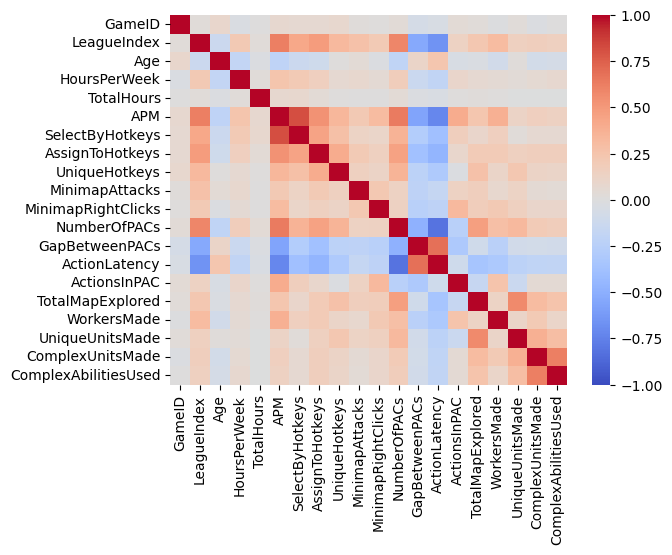

In [10]:
scdf_corr = scdf_clean.corr()

display(scdf_corr)

sns.heatmap(scdf_corr, cmap='coolwarm', vmin = -1, vmax = 1)

<h1>Preparing to Model</h1>
Overall, I'm surprised at the general weakness of correlations.
Number of PACs and Gap Between PACs are essentially saying the same thing two different ways (gap between actions is directly related to actions per minute). The single most interesting correlation is probably "Select by hotkeys" at "Actions Per Minute", but it does make sense that players who are more adept at using hotkeys are better at taking more actions more quickly. 

The column most fruitful to predict will be League Index:<br>
1: Bronze <br>
2: Silver <br>
3: Gold <br>
4: Platinum <br>
5: Diamond <br>
6: Master<br>
7: GrandMaster<br>
8: Professional <br>

Despite the numbers representing cateogries/classifications of ranking, the ranks are represented in an *ordinal* manner. If the ML results are accurate, the model could be used to build a tool/app where players could enter their stats† and the app could tell them what their potential competative Starcraft rank would be in 2013. This number could be presented as an integer (definite rank) or float (how close to gaining/losing a rank)

---
† The stats provided in this dataset are aggregates calculated in the process of writing an academic paper (Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning), and are unliekly to be available to the playerbase at larege.

<Axes: xlabel='LeagueIndex', ylabel='Count'>

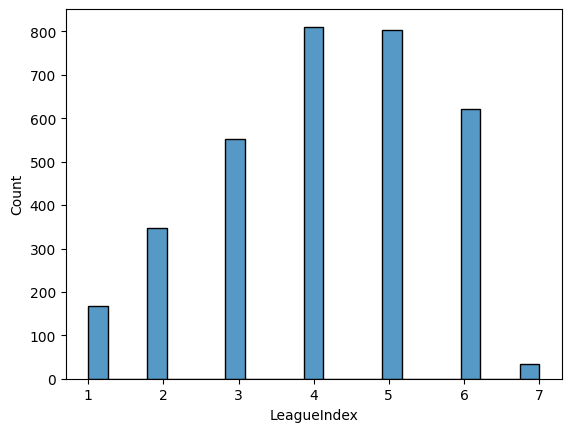

In [11]:
sns.histplot(x = scdf_clean['LeagueIndex'])

I knew from the original .describe() that there was a fairly normal distribution of leage indices represented, but I *also* knew that there were players with League Index 8 (Professional) in the dataset. It seems that all those records were set aside in the sc_null population. 

<Axes: xlabel='LeagueIndex', ylabel='Count'>

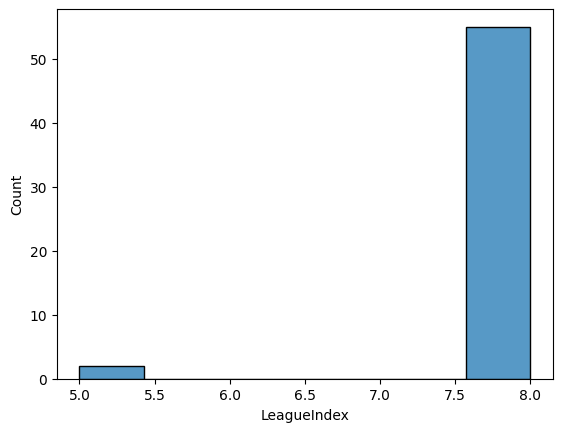

In [12]:
sns.histplot(sc_null['LeagueIndex'])

<h3> Facts:</h3>

+ The LeagueIndex 8 players were removed for not having Age/HoursPerWeek/TotalHours data
+ based on the scdf_clean correlation table/heat map,  these three columns have fairly weak correlations across the board.
+ + Hours Per Week may be an exception to this 

<h3> Decision</h3> 

+ The predictive model will be better overall if the null-value columns are dropped rather than the null-value rows being removed.

<h1>Prepping to Model</h1>

<small>... if this is prep, what have we been doing until now?</small>

In [13]:
scdf_ready = scdf.drop(columns=['Age', 'HoursPerWeek', 'TotalHours'])

<h3>Split:</h3>

In [14]:
target = 'LeagueIndex'

X_SC = scdf_ready.drop(columns=[target, 'GameID'])

y_sc = scdf_ready[target]

X_SC_train, X_SC_test, y_sc_train, y_sc_test = train_test_split(X_SC, y_sc, train_size=0.8, random_state=88)

assert len(X_SC_train) + len(X_SC_test) == len(X_SC), 'you messed up the split'

<h3>Baseline:</h3>

In [18]:
baseline = [scdf_ready.LeagueIndex.mean()]*len(y_sc_train)


<h1>Model Building</h1>

<b>Encoder:</b> Unnecessary as string type data has already been dispensed with

<b>Imputer:</b> Also not necessary as the columns containing null values were deemed irrelevant to the model

In [19]:
model_lr = make_pipeline(LinearRegression())

model_lr.fit(X_SC_train, y_sc_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [20]:
model_dt = make_pipeline(DecisionTreeRegressor(random_state=88))

model_dt.fit(X_SC_train, y_sc_train)

Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=88))])

In [21]:
model_rf = make_pipeline(RandomForestRegressor(random_state=88))

model_rf.fit(X_SC_train, y_sc_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=88))])

In [ ]:
model_xg = make_pipeline(XGBRegressor(random_state=88))

model_xg.fit(X_SC_train, y_sc_train)

<h1>Checking Metrics</h1>

In [25]:
print(' baseline score')
print(mean_absolute_error(y_sc_train, baseline).round(2))
print()
print('linear model score')
print(mean_absolute_error(y_sc_train, model_lr.predict(X_SC_train)).round(2))
print(mean_absolute_error(y_sc_test, model_lr.predict(X_SC_test)).round(2))

#---
print('-------')
print('decision tree model score')
print(mean_absolute_error(y_sc_train, model_dt.predict(X_SC_train)).round(2))
print(mean_absolute_error(y_sc_test, model_dt.predict(X_SC_test)).round(2))
print('-------')
print('random forest model score')
print(mean_absolute_error(y_sc_train, model_rf.predict(X_SC_train)).round(2))
print(mean_absolute_error(y_sc_test, model_rf.predict(X_SC_test)).round(2))
print('-------')
print('XG Boost model score')
print(mean_absolute_error(y_sc_train, model_xg.predict(X_SC_train)).round(2))
print(mean_absolute_error(y_sc_test, model_xg.predict(X_SC_test)).round(2))

 baseline score
1.22

linear model score
0.79
0.79
-------
decision tree model score
0.0
1.13
-------
random forest model score
0.29
0.76
-------
XG Boost model score
0.14
0.81


c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [26]:
print(' baseline score')
print(r2_score(y_sc_train, baseline).round(2))
print()
print('linear model score')
print(r2_score(y_sc_train, model_lr.predict(X_SC_train)).round(2))
print(r2_score(y_sc_test, model_lr.predict(X_SC_test)).round(2))

#---
print('-------')
print('decision tree model score')
print(r2_score(y_sc_train, model_dt.predict(X_SC_train)).round(2))
print(r2_score(y_sc_test, model_dt.predict(X_SC_test)).round(2))
print('-------')
print('random forest model score')
print(r2_score(y_sc_train, model_rf.predict(X_SC_train)).round(2))
print(r2_score(y_sc_test, model_rf.predict(X_SC_test)).round(2))
print('-------')
print('XG Boost model score')
print(r2_score(y_sc_train, model_xg.predict(X_SC_train)).round(2))
print(r2_score(y_sc_test, model_xg.predict(X_SC_test)).round(2))

 baseline score
-0.0

linear model score
0.57
0.59
-------
decision tree model score
1.0
0.1
-------
random forest model score
0.94
0.62
-------
XG Boost model score
0.98
0.57


c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Annie\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

<h1>Conclusion</h1>

Random Forest model scored the best for both MAE and R2 in the testing sets, but the margin of error is still too high relative to the scale of ranking. A MAE of .76 is close to† 10% of the total possible range, which is too large to be comfident in the results. 

A larger dataset is required to accurately predict the rankings of non-studied players.


----
† I called someone smarter than me and we couldn't decide if rankings 1-8 was a range of 7 (difference between high and low) or 8 (count of possible values), hence uncertainty if .76 is more or less than 10% of the total range.